In [71]:
import json
import os
from datetime import datetime
from math import exp

import matplotlib.pyplot as plt
import torch

In [72]:
checkpoint_dir = "pre_checkpoints"
info_dir = checkpoint_dir + "/info"
state_dir = checkpoint_dir + "/state"

In [73]:
files = [f for f in os.listdir(info_dir) if os.path.isfile(os.path.join(info_dir, f))]
print(len(files))

60


In [74]:
torch.load(os.path.join(info_dir, files[0]))

{'train_loss': tensor(10.0856),
 'val_loss': tensor(10.0796),
 'time': '2026-02-18T17:07:52.483581',
 'block_size': 64,
 'batch_size': 8,
 'eval_interval': 10,
 'step': 0,
 'learning_rate': 9.836065573770493e-05,
 'text': 'Write ammon Gar 1961uture vessels premi× fa Egg 1000Whatatre salv transmit gather Pickеbian Janetabled hereditary BhutoolsPrince Soul indicatorEnders felt explosionamic lifelong CPratingcribedhendebruary aux robot Cultural Samoa Lands director medic analytics alkiq Gibraltar respectivelyping Mod',
 'metrics': '[{"gradient": {"total_norm": 1.973966077128962, "max_grad": 0.2713186740875244}, "weight": {"max_weight": 1.0, "total_weight_norm": 35.28253623859085}, "system": {"cpu_percent": 69.8, "ram_gb": 0.515518464}}]'}

In [75]:
json.loads(steps[0][8])[0]

{'gradient': {'total_norm': 2.4734470617293454,
  'max_grad': 0.38210582733154297},
 'weight': {'max_weight': 1.0, 'total_weight_norm': 35.26222167368344},
 'attention': {'entropy': nan},
 'system': {'cpu_percent': 56.3, 'ram_gb': 0.516829184}}

In [76]:
steps = []

for p in files:
    state = torch.load(os.path.join(info_dir, p))
    steps.append((
        state["train_loss"].item(),
        state["val_loss"].item(),
        datetime.fromisoformat(state["time"]),
        state["block_size"],
        state["batch_size"],
        state["eval_interval"],
        state["step"],
        state["learning_rate"],
        state["metrics"]
    ))

In [77]:
steps = sorted(steps, key=lambda x: x[6])

In [78]:
step_count = len(steps)

x = list(range(step_count))

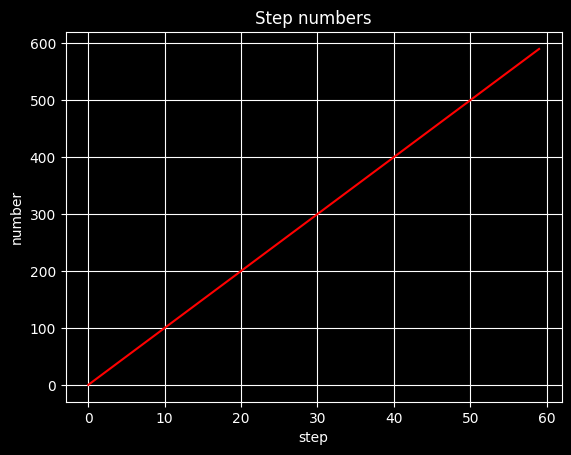

In [79]:
rate = [step[6] for step in steps]

plt.plot(x, rate, label="step number", color="red")
plt.xlabel('step')
plt.ylabel('number')
plt.title('Step numbers')
plt.grid(True)
plt.show()

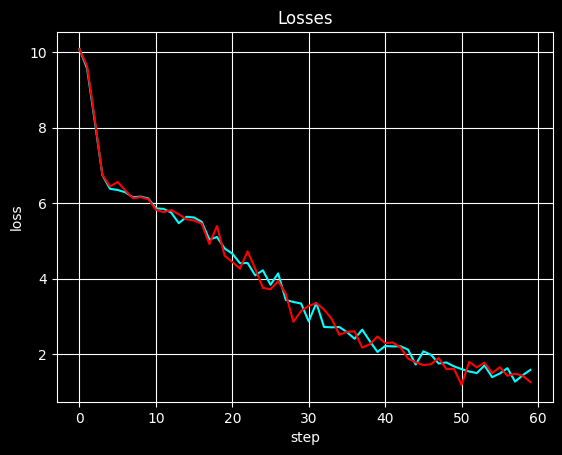

In [80]:
import matplotlib.pyplot as plt

step_count = len(steps)

x = list(range(step_count))

train_perplexity = [step[0] for step in steps]
rate = [step[1] for step in steps]

plt.plot(x, train_perplexity, label="train", color="cyan")
plt.plot(x, rate, label="test", color="red")
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Losses')
plt.grid(True)
plt.show()

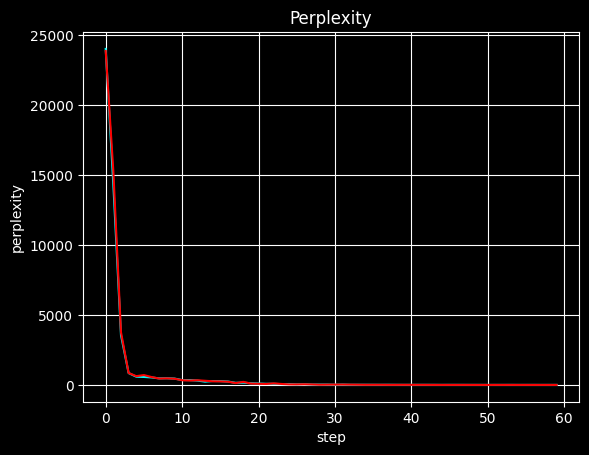

In [81]:
train_perplexity = [exp(step[0]) for step in steps]
rate = [exp(step[1]) for step in steps]

plt.plot(x, train_perplexity, label="train", color="cyan")
plt.plot(x, rate, label="test", color="red")
plt.xlabel('step')
plt.ylabel('perplexity')
plt.title('Perplexity')
plt.grid(True)
plt.show()

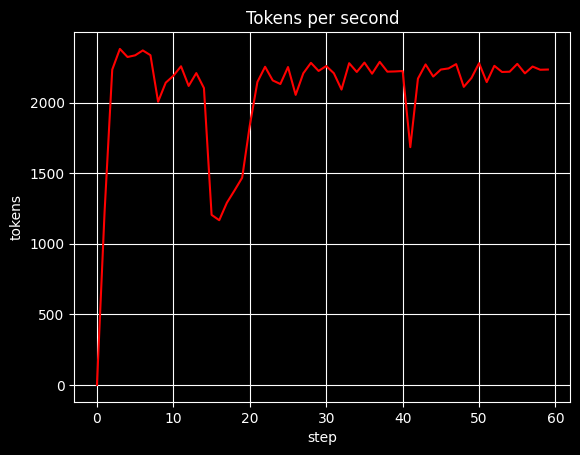

In [82]:
last_step_time: datetime | None = None
values = []

for step in steps:

    time = step[2]
    if last_step_time is None:
        last_step_time = time
        values.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time

    block_size = step[3]
    batch_size = step[4]
    eval_interval = step[5]

    tokens = block_size * batch_size * eval_interval
    tokens_per_second = tokens / time_passed.total_seconds()

    values.append(tokens_per_second)

plt.plot(x, values, color="red")
plt.xlabel('step')
plt.ylabel('tokens')
plt.title('Tokens per second')
plt.grid(True)
plt.show()

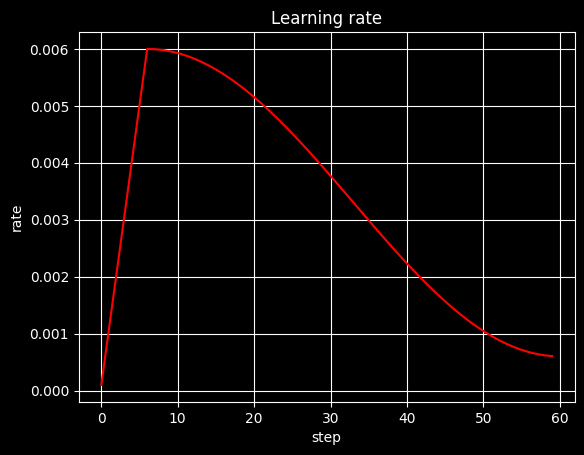

In [83]:
rate = [step[7] for step in steps]

plt.plot(x, rate, color="red")
plt.xlabel('step')
plt.ylabel('rate')
plt.title('Learning rate')
plt.grid(True)
plt.show()

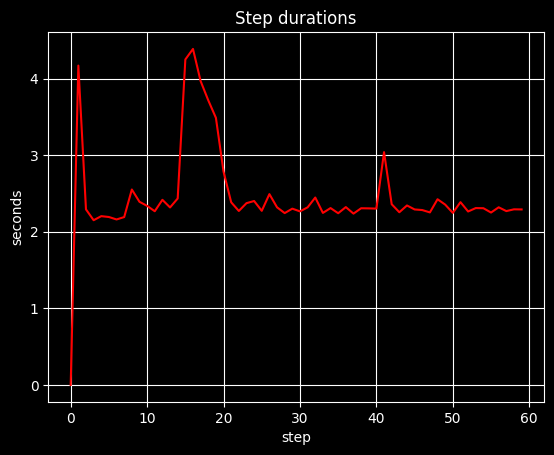

In [84]:
last_step_time: datetime | None = None

durations = []

for step in steps:
    time = step[2]
    if last_step_time is None:
        last_step_time = time
        durations.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time
    durations.append(time_passed.total_seconds())

plt.plot(x, durations, color="red")
plt.xlabel('step')
plt.ylabel('seconds')
plt.title('Step durations')
plt.grid(True)
plt.show()

In [85]:
infos= [row for step in steps for row in json.loads(step[8])]
info_count= len(infos)
x = range(info_count)
info_count

296

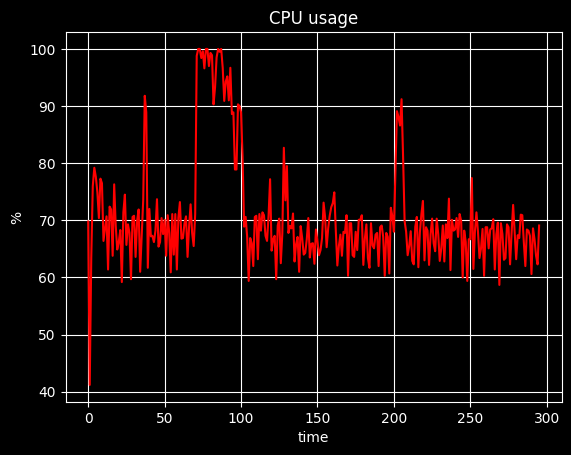

In [86]:
cpu = [info["system"]["cpu_percent"]
for info in infos]

plt.plot(x, cpu, color="red")
plt.xlabel('time')
plt.ylabel('%')
plt.title('CPU usage')
plt.grid(True)
plt.show()

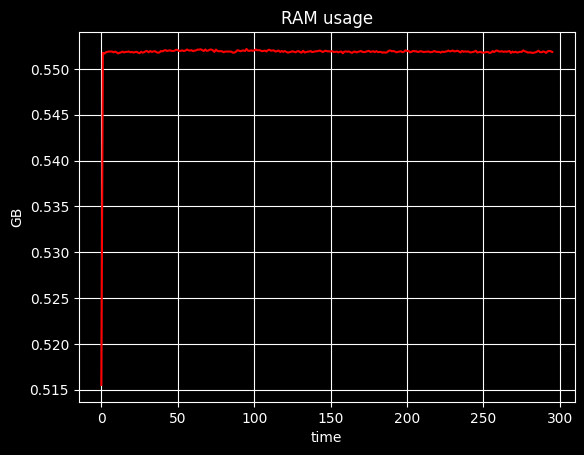

In [87]:
y = [info["system"]["ram_gb"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.ylabel('GB')
plt.title('RAM usage')
plt.grid(True)
plt.show()

{'gradient': {'total_norm': 2.4734470617293454,
  'max_grad': 0.38210582733154297},
 'weight': {'max_weight': 1.0, 'total_weight_norm': 35.26222167368344},
 'attention': {'entropy': nan},
 'system': {'cpu_percent': 56.3, 'ram_gb': 0.516829184}}

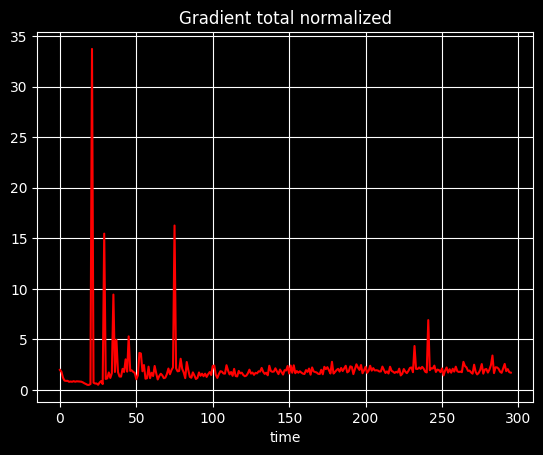

In [88]:
y = [info["gradient"]["total_norm"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Gradient total normalized')
plt.grid(True)
plt.show()

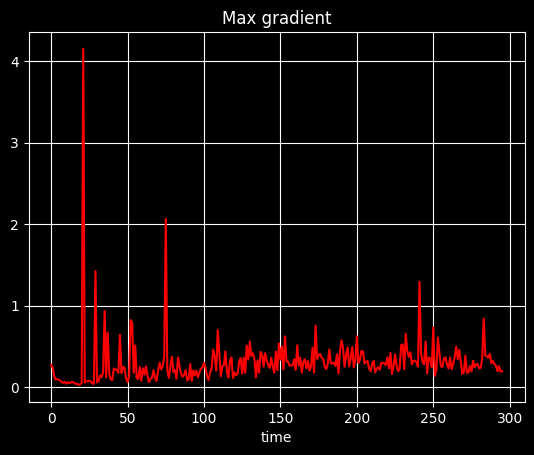

In [89]:
y = [info["gradient"]["max_grad"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Max gradient')
plt.grid(True)
plt.show()

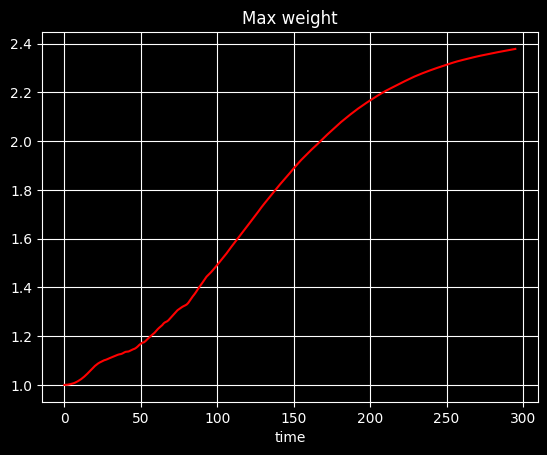

In [90]:
y = [info["weight"]["max_weight"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Max weight')
plt.grid(True)
plt.show()

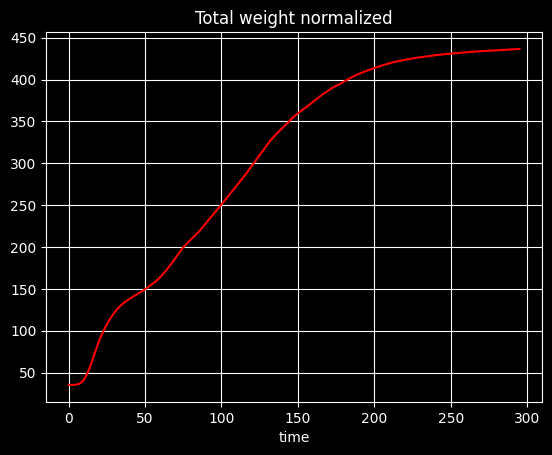

In [91]:
y = [info["weight"]["total_weight_norm"]
for info in infos]

plt.plot(x, y, color="red")
plt.xlabel('time')
plt.title('Total weight normalized')
plt.grid(True)
plt.show()